In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal
from scipy.signal import find_peaks
from scipy import signal
from scipy.interpolate import CubicSpline
import mpl_axes_aligner 
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib widget

In [2]:
# data=pd.read_csv("not_moving_trot.csv")
# table=data[7500:]


data=pd.read_csv("faster-gait-comparison-trotting.csv")
table=data
print(len(table.index))
table

10937


,time,iterations,bodyOrientation0,bodyOrientation0.1,bodyOrientation0.2,bodyOrientation0.3,vb0,rpy0,omegab0,omega0,...,qdd30,t30,q31,qd31,qdd31,t31,q32,qd32,qdd32,t32
0,20.000,1.000000,-0.000021,-0.000813,0.000114,1.128930e-07,-0.000043,0.019810,0.019808,0.02229,...,-0.553630,-0.796798,0.003339,67.60050,-0.052514,1.64113,-0.006561,-597.598,-3.49750,NaN
1,20.001,1.000000,-0.000031,-0.000813,0.000113,7.880330e-08,-0.000063,-0.019806,-0.019805,0.02229,...,-0.111975,-0.796801,-0.003338,4.70413,-0.459525,1.64114,0.006561,-517.388,-3.08372,NaN
2,20.002,1.000000,-0.000021,-0.000813,0.000114,1.149670e-07,-0.000043,0.019810,0.019808,0.02229,...,-0.553630,-0.796798,0.003339,67.60050,-0.052514,1.64113,-0.006561,-597.598,-3.49750,NaN
3,20.003,1.000000,-0.000031,-0.000813,0.000113,8.086830e-08,-0.000063,-0.019806,-0.019805,0.02229,...,-0.111975,-0.796801,-0.003338,4.70413,-0.459525,1.64114,0.006561,-517.388,-3.08372,NaN
4,20.004,1.000000,-0.000021,-0.000813,0.000114,1.150600e-07,-0.000043,0.019809,0.019808,0.02229,...,-0.553630,-0.796798,0.003339,67.60050,-0.052514,1.64113,-0.006561,-597.598,-3.49750,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,30.932,0.999931,0.002694,0.000038,-0.011434,1.047440e+00,0.005388,0.071212,0.065368,10.26370,...,0.190480,-0.931444,-3.778400,-199.32000,-0.464412,1.45961,2.281880,1135.650,6.53217,NaN
10933,30.933,0.999931,0.002711,-0.000083,-0.011427,1.046360e+00,0.005424,0.036167,0.030644,10.26480,...,0.216726,-0.935414,-3.969980,-191.57800,-0.411220,1.46298,3.373900,1092.020,6.28684,NaN
10934,30.934,0.999931,0.002729,-0.000194,-0.011419,1.044820e+00,0.005462,0.038213,0.033122,10.26580,...,0.197287,-0.939551,-4.136080,-166.09700,-0.328440,1.46740,4.412730,1038.830,5.99654,NaN
10935,30.935,0.999931,0.002740,-0.000298,-0.011410,1.043320e+00,0.005487,0.024608,0.019863,10.26680,...,0.246836,-0.943845,-4.294810,-158.73000,-0.281152,1.47281,5.410420,997.688,5.76515,NaN


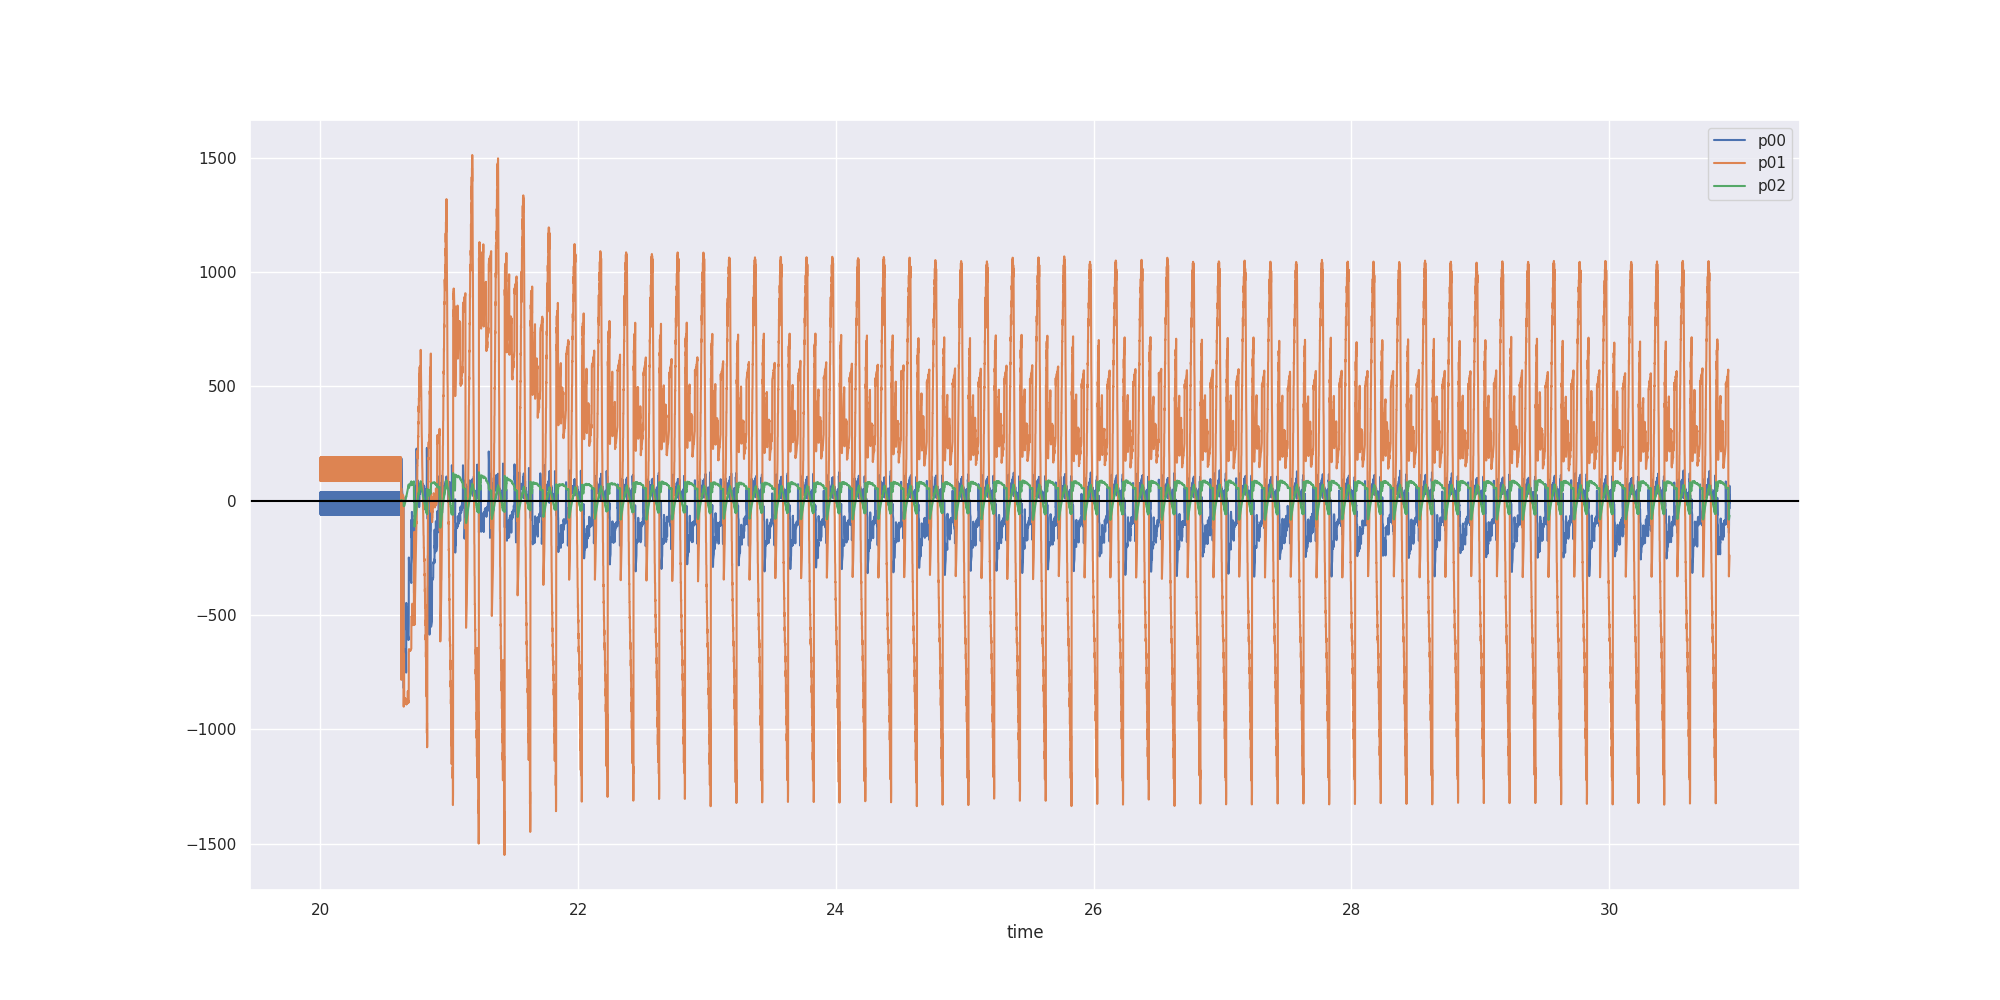

In [3]:
plt.close()
plt.figure(figsize=(20,10))
ax = plt.gca()

holder=[]
for i in range(len(table.index)):
    holder.append(table.qd00[i]*table.t00[i])
table.insert(len(table.columns), "p00", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd01[i]*table.t01[i])
table.insert(len(table.columns), "p01", holder, True)
holder=[]
for i in range(len(table.index)):
    holder.append(table.qd02[i]*table.t02[i])
table.insert(len(table.columns), "p02", holder, True)

# table.plot( x = 'time' , y = 'q01', ax = ax )
table.plot( x = 'time' , y = 'p00', ax = ax )
table.plot( x = 'time' , y = 'p01', ax = ax )
table.plot( x = 'time' , y = 'p02', ax = ax )
# table.plot( x = 'time' , y = 'qd00', ax = ax )
# table.plot( x = 'time' , y = 't00', ax = ax )
# table.plot( x = 'time' , y = 't01', ax = ax )

plt.axhline(y=0.0, color='black', linestyle='-')

plt.show()